In [1]:
import matplotlib.pyplot as plt
import numpy.random
import numpy as np
import seaborn
import sklearn as sk
import pandas as pd
import glob
import os
import tensorflow as tf

%pylab inline

print('\nThe scikit-learn version is {}.'.format(sk.__version__))
print('The Numpy version is {}.'.format(np.__version__))
print('The TensorFlow version is {}.'.format(tf.__version__))

Populating the interactive namespace from numpy and matplotlib

The scikit-learn version is 0.18.1.
The Numpy version is 1.12.1.
The TensorFlow version is 1.0.1.


# Problem 1.2

In [2]:
def L1(x1,x2):
    return abs(x1[0]-x2[0])+abs(x1[1]-x2[1])
def L2(x1,x2):
    return ((x1[0]-x2[0])**2.+(x1[1]-x2[1])**2.)**(1./2.)
def LInf(x1,x2):
    return max([abs(x1[0]-x2[0]), abs(x1[1]-x2[1])])

In [8]:
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return ''.join(rv)
def bbmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\e{\begin{bmatrix}']
    rv +=[r' X_a & X_b & Dist \\']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}}']
    return ''.join(rv)

def bbbmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    for l in lines:
        ct=0
        for x in l.split():
            ct+=1
            if ct==1 or ct ==2:
                rv +='  ' + ' & '.join(l.split())
            else:
                rv +='  ' + ' & '
        rv += r'\\'
    rv +=  [r'\end{bmatrix}']
    return ''.join(rv)

## Max and Min Method

In [3]:
x1=[0.1,0.5];x2=[0.35,0.75];x3=[0.28,1.35];x4=[0,1.01]

XAll=[x1,x2,x3,x4]
XBlack=[x1,x2]
XRed=x3
XBlue=x4

XComp=[]
a=0;
for xa in XAll:
    a+=1;b=0
    for xb in XAll:
        b+=1
        if xa!=xb and b>a:
            XComp.append([a,b,LInf(xa,xb)])
XComp=np.array(XComp)            


In [4]:

print XComp
import numpy_to_latex as nl

[[ 1.    2.    0.25]
 [ 1.    3.    0.85]
 [ 1.    4.    0.51]
 [ 2.    3.    0.6 ]
 [ 2.    4.    0.35]
 [ 3.    4.    0.34]]


In [7]:
print bbmatrix(XComp)

\e{\begin{bmatrix} X_a & X_b & Dist \\  1. & 2. & 0.25\\  1. & 3. & 0.85\\  1. & 4. & 0.51\\  2. & 3. & 0.6\\  2. & 4. & 0.35\\  3. & 4. & 0.34\\\end{bmatrix}}


## Centroid Method

In [101]:
MeanXBlack=[np.mean([x1[0],x2[0]]),np.mean([x1[1],x2[1]])]
print MeanXBlack
XAllMean=[MeanXBlack,x3,x4]
XCompMean=[]
a=0;
for xa in XAllMean:
    a+=1;b=0
    for xb in XAllMean:
        b+=1
        if xa!=xb and b>a:
            XCompMean.append([a,b,LInf(xa,xb)])
XCompMean=np.array(XCompMean)   

print XCompMean
print bbmatrix(XCompMean)

[0.22499999999999998, 0.625]
[[ 1.     2.     0.725]
 [ 1.     3.     0.385]
 [ 2.     3.     0.34 ]]
\e{\begin{bmatrix} X_a & X_b & Dist \\  1. & 2. & 0.725\\  1. & 3. & 0.385\\  2. & 3. & 0.34\\\end{bmatrix}}


## Average Methods

In [19]:
x1=[0.1,0.5];x2=[0.35,0.75];x3=[0.28,1.35];x4=[0,1.01]

XAll=[x1,x2,x3,x4]
XBlack=[x1,x2]
XRed=x3
XBlue=x4

XComp=[]
a=0;
for xa in XAll:
    a+=1;b=0
    for xb in XAll:
        b+=1
        if xa!=xb and b>a:
            XComp.append([a,b,LInf(xa,xb)])
XComp=np.array(XComp)     

print XComp

BlackBlue=(XComp[2,2]+XComp[4,2])/2.
BlackRed=(XComp[1,2]+XComp[3,2])/2.

PXComp=np.array([[1,2,BlackRed],[1,3,BlackBlue],[2,3,XComp[5,2]]])
print bbmatrix(PXComp)

[[ 1.    2.    0.25]
 [ 1.    3.    0.85]
 [ 1.    4.    0.51]
 [ 2.    3.    0.6 ]
 [ 2.    4.    0.35]
 [ 3.    4.    0.34]]
\e{\begin{bmatrix} X_a & X_b & Dist \\  1. & 2. & 0.725\\  1. & 3. & 0.43\\  2. & 3. & 0.34\\\end{bmatrix}}


## Drawing Dendograms

In [102]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

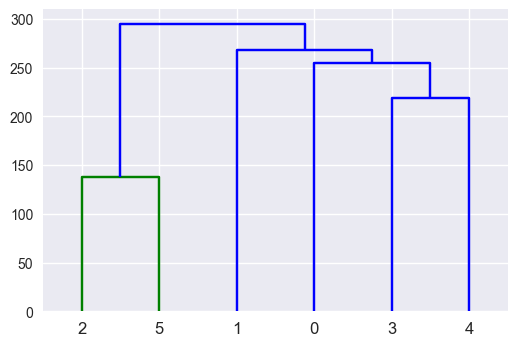

In [103]:
ytdist = np.array([662., 877., 255., 412., 996., 295., 468., 268.,
                   400., 754., 564., 138., 219., 869., 669.])
Z = hierarchy.linkage(ytdist, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)